# Problem Statement
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Task 1**
* Predict if water is safe for human consumption or not

1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable -1 and Not potable -0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<AxesSubplot:xlabel='Potability', ylabel='count'>

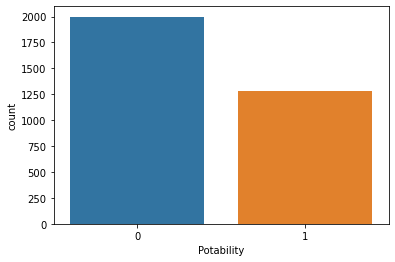

In [6]:
sns.countplot(x='Potability',data=df )

In [7]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [8]:
print(f"0 : {round(1998 /3276 * 100 , 2)}")
print(f"1 : {round(1278 /3276 * 100 , 2)}")

0 : 60.99
1 : 39.01


**This is not a imbalanced dataset as we have 60:40 ratio of two classes**

## EDA and Feature Engineering

In [9]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [10]:
for feature in df.columns:
    if df[feature].isnull().sum()>0:
        print(f"{feature} : {round(df[feature].isnull().mean(),4)*100}%")

ph : 14.99%
Sulfate : 23.84%
Trihalomethanes : 4.95%


In [11]:
## Fill missing values with median
for feature in df.columns:
    df[feature].fillna(df[feature].median() , inplace = True)

In [12]:
## find dublicate rows in dataset
duplicate = df[df.duplicated()]
duplicate

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability


In [13]:
for i in df.columns:
    print(f" {i}  :  {len(df[i].unique())}")

 ph  :  2785
 Hardness  :  3276
 Solids  :  3276
 Chloramines  :  3276
 Sulfate  :  2495
 Conductivity  :  3276
 Organic_carbon  :  3276
 Trihalomethanes  :  3115
 Turbidity  :  3276
 Potability  :  2


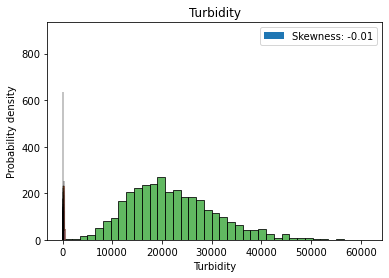

In [14]:
for feature in df.columns:
    if feature == "Potability":
        pass
    else: 
        bar = sns.histplot(df[feature] , kde_kws = {'bw' : 1} , )
        bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
        plt.xlabel(feature)
        plt.ylabel("Probability density")
        plt.title(feature)

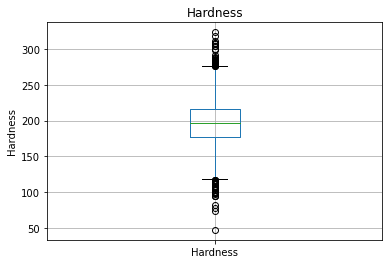

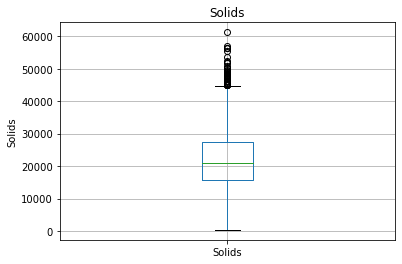

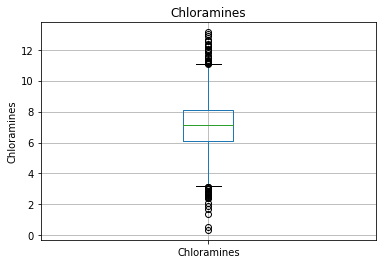

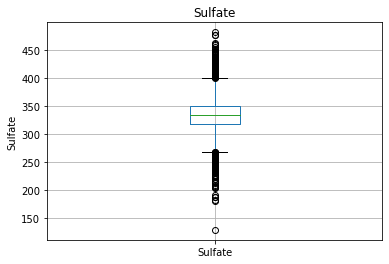

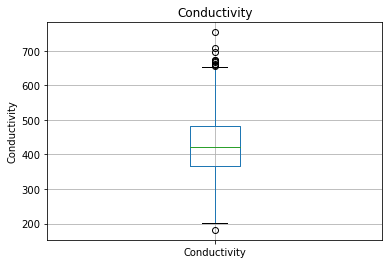

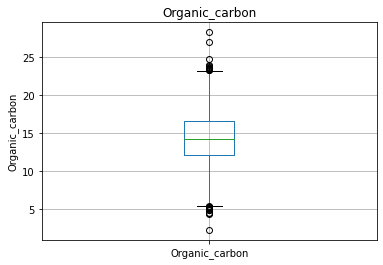

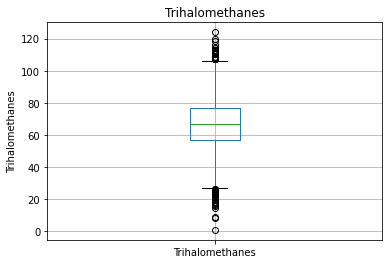

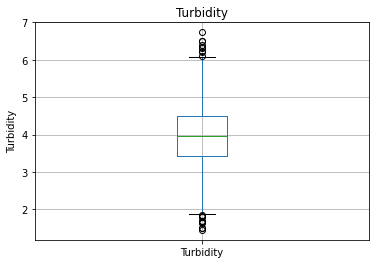

In [15]:
# we don't have missing values in our dataset so we can skip if condition 
for feature in df.columns:
    if 0 in df[feature].unique():# because log 0 is not defined thats why we are using this condition or we can also use log1p
        pass
    else:
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()           

In [16]:
# removing outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ph                     1.592377
Hardness              39.816918
Solids             11666.071830
Chloramines            1.987466
Sulfate               33.291119
Conductivity         116.057890
Organic_carbon         4.491850
Trihalomethanes       20.018954
Turbidity              1.060609
Potability             1.000000
dtype: float64


In [17]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2666, 10)

In [18]:
df["Potability"].value_counts()

0    1671
1     995
Name: Potability, dtype: int64

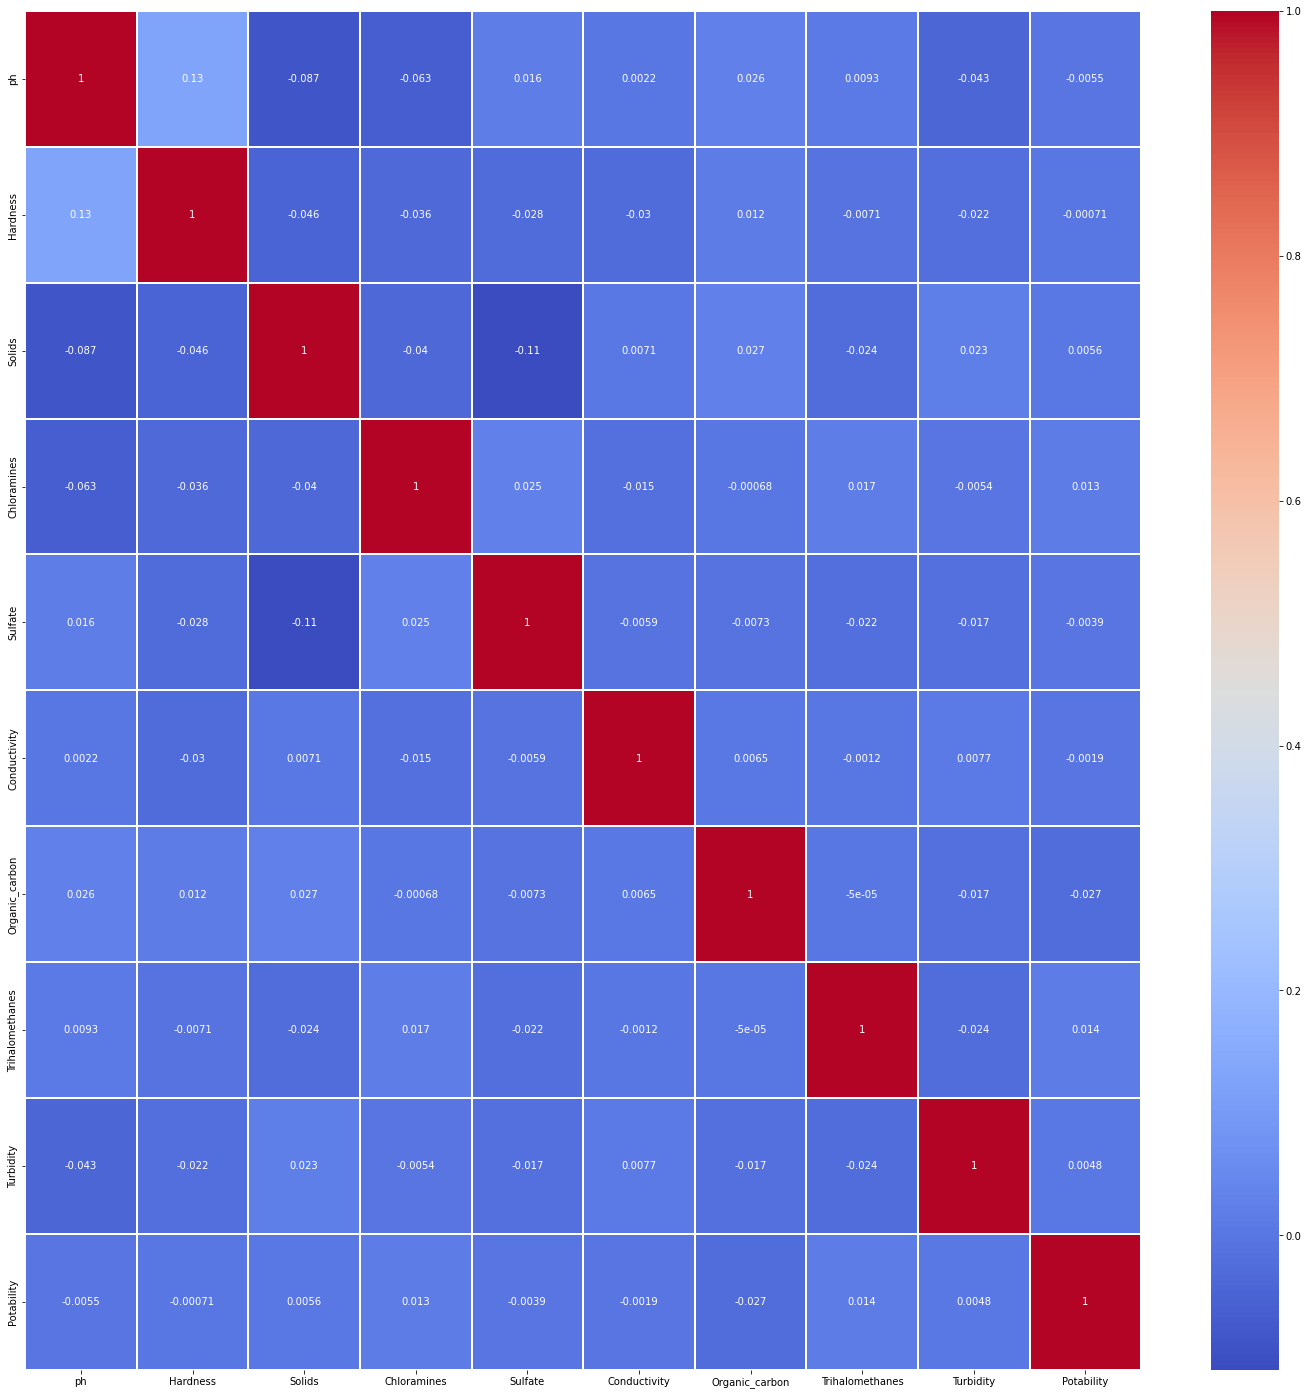

In [19]:
## Correlation
plt.figure(figsize=(25,25))
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=True, linewidth=2)

* **all the independent variables have less than 10% correlattion with each other so we can't drop any variable**

In [20]:
### Multivariate analysis
#sns.pairplot(df ,  height=10 , size = 5 , hue = "Potability" )

In [21]:
### splitting data into x and y
X = df.iloc[: , : -1]
y = df.iloc[ : , -1]

In [22]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 5)

## Oversampling using SMOTE

In [23]:
#from collections import Counter
#from imblearn.over_sampling import SMOTE

In [24]:
#counter = Counter(y_train)
#print(f"before oversampling: {counter}")
#smt = SMOTE()
#X_train , y_train = smt.fit_resample(X_train , y_train)
#counter = Counter(y_train)
#print(f"after oversampling : {counter}")

## Feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_final = sc.fit_transform(X_train)
X_test_final = sc.transform(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', class_weight = "balanced_subsample",random_state = 51)
rf_classifier.fit(X_train_final, y_train)
y_pred = rf_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred)

0.635

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75       497
           1       0.54      0.26      0.35       303

    accuracy                           0.64       800
   macro avg       0.60      0.56      0.55       800
weighted avg       0.61      0.64      0.60       800



In [29]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train_final, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_xgb)

0.62125

In [30]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       497
           1       0.50      0.38      0.43       303

    accuracy                           0.62       800
   macro avg       0.59      0.57      0.57       800
weighted avg       0.61      0.62      0.61       800



## Support vector Machine

In [31]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC(class_weight = "balanced" )
svc_classifier.fit(X_train_final, y_train)
y_pred_scv = svc_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_scv)

0.6225

In [32]:
print(classification_report(y_test, y_pred_scv))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       497
           1       0.50      0.50      0.50       303

    accuracy                           0.62       800
   macro avg       0.60      0.60      0.60       800
weighted avg       0.62      0.62      0.62       800



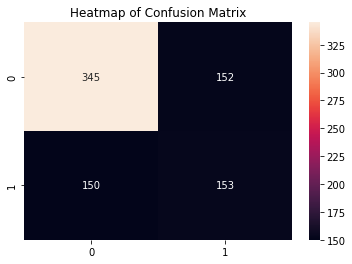

In [33]:
cm = confusion_matrix(y_test, y_pred_scv)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True, fmt = "d")
plt.show()

## Hyperparameter Tuning with Support vector Machine

In [34]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 200 , 400 , 600 , 800], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.628 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.630 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.627 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.628 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 200, 400, 600, 800],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [38]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC(class_weight = "balanced"  , C=100, gamma=0.01)
svc_classifier.fit(X_train_final, y_train)
y_pred_scv = svc_classifier.predict(X_test_final)
accuracy_score(y_test, y_pred_scv)

0.6325

In [39]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       497
           1       0.50      0.38      0.43       303

    accuracy                           0.62       800
   macro avg       0.59      0.57      0.57       800
weighted avg       0.61      0.62      0.61       800



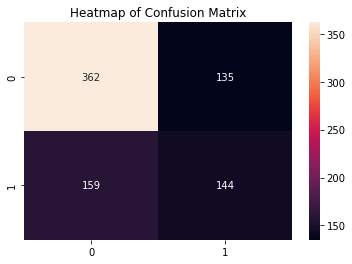

In [40]:
cm = confusion_matrix(y_test, y_pred_scv)
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True , fmt = "d")
plt.show()

In [41]:
## Pickle
from sklearn.svm import SVC
import pickle

# save model
pickle.dump(svc_classifier, open('Model.pkl', 'wb'))

# load model
water_quality_model = pickle.load(open('Model.pkl', 'rb'))

# predict the output
y_pred =water_quality_model.predict(X_test_final)

# confusion matrix
print('Confusion matrix of Support vector Machine : \n',confusion_matrix(y_test, y_pred),'\n')


Confusion matrix of Support vector Machine : 
 [[362 135]
 [159 144]] 

